Solving questions from: [2022 hw - week 3](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2022/03-classification/homework.md)

# Section 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('data/housing.csv')

In [3]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 
           'median_income', 'median_house_value', 'ocean_proximity']

data = data[columns]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
median_bedrooms = data.total_bedrooms.median()
data.total_bedrooms = data.total_bedrooms.fillna(median_bedrooms)

In [6]:
data = data.assign(
    rooms_per_household=data['total_rooms'] / data['households'],
    bedrooms_per_room=data['total_bedrooms'] / data['total_rooms'],
    population_per_household=data['population'] / data['households'],
)

data.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


# Section 2

## Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

In [7]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
data.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

**Answer**: <1H OCEAN

## Question 2

* Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

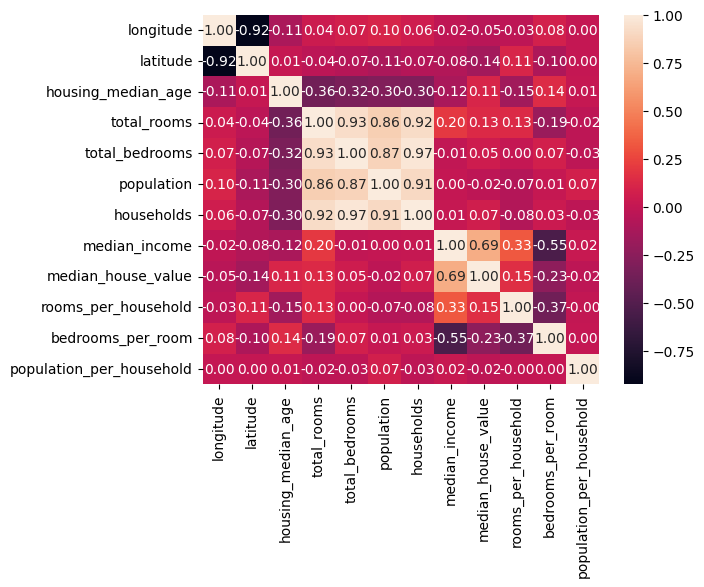

In [9]:
_ = sns.heatmap((
    data.select_dtypes('number')
    .corr()
), annot=True, fmt='.2f')

**Answer**: `total_bedrooms` and `households`

# Section 3

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

In [11]:
mean_median_house_value = data.median_house_value.mean()
print(round(mean_median_house_value), '\n')

data['above_average'] = (data.median_house_value > mean_median_house_value).astype(int)

minus_mhv= data.copy()
del minus_mhv['median_house_value']
minus_mhv.sample(7).T

206856 



,6521,20044,16563,12498,12044,11864,6197
longitude,-118.03,-119.03,-121.48,-121.46,-117.51,-121.23,-117.89
latitude,34.06,36.06,37.77,38.56,33.89,40.29,34.09
housing_median_age,24.0,36.0,19.0,52.0,16.0,21.0,37.0
total_rooms,2343.0,1925.0,2364.0,1750.0,5418.0,3229.0,1813.0
total_bedrooms,834.0,443.0,373.0,372.0,1005.0,667.0,394.0
population,3537.0,1405.0,1264.0,764.0,2690.0,1501.0,1100.0
households,824.0,422.0,390.0,369.0,1088.0,582.0,375.0
median_income,2.1094,2.162,5.0176,2.9191,4.0556,2.1524,3.4453
ocean_proximity,<1H OCEAN,INLAND,INLAND,INLAND,INLAND,INLAND,<1H OCEAN
rooms_per_household,2.843447,4.561611,6.061538,4.742547,4.979779,5.54811,4.834667


In [12]:
# splits data into train, val, and test
train_df, test_df = train_test_split(minus_mhv, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

X_train = train_df.reset_index(drop=True).copy()
y_train = X_train.pop('above_average')

len(X_train), len(y_train), len(val_df), len(test_df), type(X_train), type(y_train)

(12384,
 12384,
 4128,
 4128,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [13]:
X_train.head().T

,0,1,2,3,4
longitude,-119.67,-118.32,-121.62,-118.63,-122.3
latitude,34.43,33.74,39.13,34.24,37.52
housing_median_age,39.0,24.0,41.0,9.0,38.0
total_rooms,1467.0,6097.0,1317.0,4759.0,2769.0
total_bedrooms,381.0,794.0,309.0,924.0,387.0
population,1404.0,2248.0,856.0,1884.0,994.0
households,374.0,806.0,337.0,915.0,395.0
median_income,2.3681,10.1357,1.6719,4.8333,5.5902
ocean_proximity,<1H OCEAN,NEAR OCEAN,INLAND,<1H OCEAN,NEAR OCEAN
rooms_per_household,3.92246,7.564516,3.908012,5.201093,7.010127


## Question 3

Calculate the *mutual information* score between `above_average` and `ocean_proximity` . Use the training set only.

In [14]:
mi = mutual_info_score(train_df.above_average, train_df.ocean_proximity)
round(mi, 2)

0.1

**Answer**: 0.10

## Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [15]:
train_dicts = X_train.to_dict(orient='records')  # converts the training data to dicts

with pd.option_context("display.max_rows", 8, "display.max_columns", 90):
    print(X_train.head(1))


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.67     34.43                39.0       1467.0           381.0   

   population  households  median_income ocean_proximity  rooms_per_household  \
0      1404.0       374.0         2.3681       <1H OCEAN              3.92246   

   bedrooms_per_room  population_per_household  
0           0.259714                  3.754011  


In [16]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [17]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)

# one hot encoding for columns with string values in the training data
X_train_ohe = dv.transform(train_dicts)

list(zip(dv.feature_names_, X_train_ohe[0]))

[('bedrooms_per_room', 0.25971370143149286),
 ('households', 374.0),
 ('housing_median_age', 39.0),
 ('latitude', 34.43),
 ('longitude', -119.67),
 ('median_income', 2.3681),
 ('ocean_proximity=<1H OCEAN', 1.0),
 ('ocean_proximity=INLAND', 0.0),
 ('ocean_proximity=ISLAND', 0.0),
 ('ocean_proximity=NEAR BAY', 0.0),
 ('ocean_proximity=NEAR OCEAN', 0.0),
 ('population', 1404.0),
 ('population_per_household', 3.7540106951871657),
 ('rooms_per_household', 3.9224598930481283),
 ('total_bedrooms', 381.0),
 ('total_rooms', 1467.0)]

In [18]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [19]:
model.fit(X_train_ohe, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [20]:
def get_X_y(df):
    
    X = df.reset_index(drop=True).copy()
    y = X.pop('above_average').values
    dicts = X.to_dict(orient='records')

    return dicts, y

val_dicts, y_val = get_X_y(val_df)


In [21]:
len(val_dicts), len(y_val), type(val_dicts), type(y_val)

(4128, 4128, list, numpy.ndarray)

In [22]:
X_val_ohe = dv.transform(val_dicts) ## transforms validation data to make predictions

In [23]:
y_pred = model.predict(X_val_ohe)  # predictions 
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [24]:
val_acc = accuracy_score(y_val, y_pred)
val_acc

0.8362403100775194

**Answer**: 0.84

In [25]:
# creates a pipeline for the same task

estimators = [('dv', DictVectorizer(sparse=False)), 
              ('logistic', LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42))]
pipe = Pipeline(estimators)

pipe.fit(train_dicts, y_train)
y_pred = pipe.predict(val_dicts)

orig_accuracy = accuracy_score(y_val, y_pred)
orig_accuracy

0.8362403100775194

In [26]:
def train_logistic(df, solver="liblinear", C=1.0, max_iter=1000, random_state=42):
    """
    Trains a logistic regression model on passed Dataframe.
    """
    dicts, y = get_X_y(df)
    
    estimators = [('dv', DictVectorizer(sparse=False)), 
                  ('logistic', LogisticRegression(solver=solver, C=C, max_iter=max_iter, random_state=random_state))]
    pipe = Pipeline(estimators)
    pipe.fit(train_dicts, y_train)

    return pipe


## Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    - total_rooms
    - total_bedrooms
    - population
    - households


In [27]:
features_to_compare = ['total_rooms', 'total_bedrooms', 'population', 'households']
columns = features_to_compare + ['above_average']

train_df_ = train_df[columns].copy()

# train model
pipe_ = train_logistic(train_df_)

# make predicitons 
val_df_ = val_df[columns].copy()
val_dicts_, y_val_ = get_X_y(val_df_)
y_pred_ = pipe_.predict(val_dicts_)

# calculate accuracy scores
score_to_compare = accuracy_score(y_val_, y_pred_)

score_to_compare

0.5571705426356589

In [28]:
features_to_compare = ['total_rooms', 'total_bedrooms', 'population', 'households']
scores = []

for feat in features_to_compare:
    columns_ = list(train_df.columns).copy()
    columns_.remove(feat)
    train_df_ = train_df[columns_].copy()

    # train model
    pipe_ = train_logistic(train_df_)

    # make predicitons 
    val_df_ = val_df[columns_].copy()
    val_dicts_, y_val_ = get_X_y(val_df_)
    y_pred_ = pipe_.predict(val_dicts_)

    # calculate accuracy scores
    acc = accuracy_score(y_val_, y_pred_)
    scores.append(acc)


In [29]:
scores

[0.8214631782945736,
 0.7965116279069767,
 0.6683624031007752,
 0.7374031007751938]

In [30]:
orig_accuracy - scores

array([0.01477713, 0.03972868, 0.16787791, 0.09883721])

Interpreting `orig_accuracy - scores`:  
Since the models are trained by dropping a particular feature, the model with the higher score corresponds to the dropping of the least important feature. The higher the score of the model, lower is the difference between `orig_accuracy` and the model score.

In [31]:
features_to_compare[(orig_accuracy - scores).argmin()]

'total_rooms'

**Answer**: `total_rooms` is the least useful.

# Section 4

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column '`median_house_value`'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

In [33]:
data.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [34]:
data_reg = data.copy()

del data_reg['above_average']
data_reg.median_house_value = np.log1p(data_reg.median_house_value)
data_reg.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY,6.281853,0.172096,2.181467


In [35]:
# splits data

train_reg, test_reg = train_test_split(data_reg, test_size=0.2, random_state=42)
train_reg, val_reg = train_test_split(train_reg, test_size=0.25, random_state=42)

X_train_reg = train_reg.reset_index(drop=True).copy()
y_train_reg = X_train_reg.pop('median_house_value')

X_val_reg = val_reg.reset_index(drop=True).copy()
y_val_reg = X_val_reg.pop('median_house_value')

len(X_train_reg), len(y_train_reg), len(val_reg), len(test_reg), type(X_train_reg), type(y_train_reg)

(12384,
 12384,
 4128,
 4128,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [36]:
train_dicts_reg = X_train_reg.to_dict(orient='records')
val_dicts_reg = X_val_reg.to_dict(orient='records')
rmse_scores = []

# alpha controls the regularization of the model
alphas = [0, 0.01, 0.1, 1, 10]

for a in alphas:
    estimators = [('dv', DictVectorizer(sparse=False)), 
                  ('linreg', Ridge(alpha=a, solver="sag", random_state=42))]
    pipe_reg = Pipeline(estimators)
    
    pipe_reg.fit(train_dicts_reg, y_train_reg)
    y_pred_reg = pipe_reg.predict(val_dicts_reg)
    
    rmse_score = mean_squared_error(y_val_reg, y_pred_reg, squared=False)
    rmse_scores.append(rmse_score)


C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

In [37]:
(np.array(rmse_scores)).round(3)

array([0.523, 0.523, 0.523, 0.523, 0.523])

In [38]:
y_val_reg[:5]

0    11.479379
1    11.231901
2    12.973634
3    12.714699
4    13.122367
Name: median_house_value, dtype: float64

In [39]:
y_pred_reg[:5]

array([12.1073139 , 12.01447119, 12.21135253, 12.01655202, 12.25831307])

**Answer**: 0